In [48]:
from SciKit.utils import split_500_hits, show_report
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [49]:
# Load the data
X_train, X_test, y_train, y_test = split_500_hits()
# replace 0 with NaN for X_train and X_test
X_train = X_train.replace(0, np.nan)
X_test = X_test.replace(0, np.nan)

In [50]:
# Impute the missing values
imputer = KNNImputer(n_neighbors=5)
lr = LogisticRegression(max_iter=10000)

In [51]:
# create a pipeline

pipe1 = make_pipeline(imputer, lr) # imputer is the first step and lr is the second step
pipe1.fit(X_train, y_train)
y_pred = pipe1.predict(X_test)

C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.92      0.90        62
           1       0.82      0.74      0.78        31

    accuracy                           0.86        93
   macro avg       0.85      0.83      0.84        93
weighted avg       0.86      0.86      0.86        93

Accuracy:  0.8602150537634409


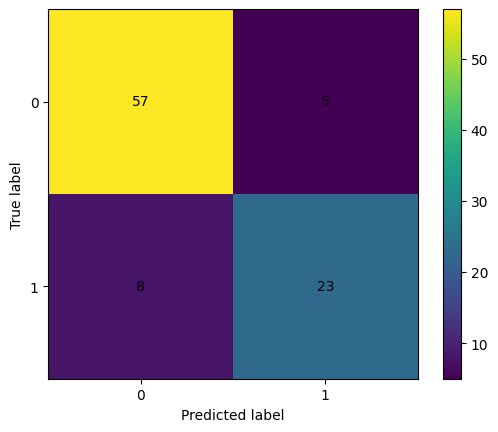

Confusion Matrix: 
 [[57  5]
 [ 8 23]]


In [52]:
show_report(y_pred, y_test) # 0.86 % accuracy

In [53]:
# Advanced pipeline

data = pd.read_csv('../Kaggle/Challenges/data/train.csv', usecols=['Destination', 'Transported', 'HomePlanet', 'Age'])

X = data.drop('Transported', axis=1)
y = data['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = ['Age']
cat_cols = ['Destination', 'HomePlanet']

num_lipeline = Pipeline(
    steps=[
        ('impute', KNNImputer(n_neighbors=5)),
        ('scale', StandardScaler())
    ]
)

In [54]:
from sklearn.impute import SimpleImputer

cat_pipeline = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)

In [55]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_lipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ],
    remainder='drop', n_jobs=-1
)

              precision    recall  f1-score   support

       False       0.56      0.67      0.61       861
        True       0.60      0.48      0.53       878

    accuracy                           0.57      1739
   macro avg       0.58      0.57      0.57      1739
weighted avg       0.58      0.57      0.57      1739

Accuracy:  0.5733179988499137


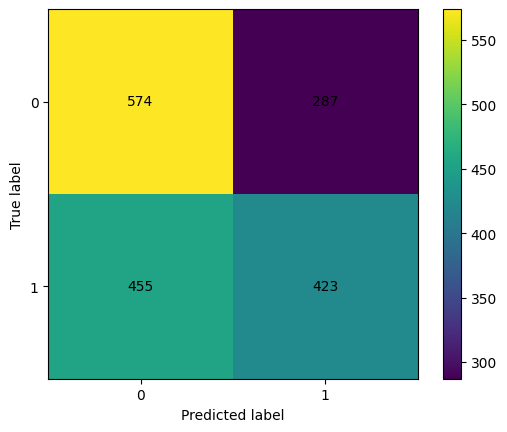

Confusion Matrix: 
 [[574 287]
 [455 423]]


In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

pipe_final = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', dtc)
    ]
)

pipe_final.fit(X_train, y_train)

y_pred = pipe_final.predict(X_test)

show_report(y_pred, y_test)